In [1]:
import os
import pandas as pd
import pyarrow

<h4> Bringing in the data

In [3]:
print(os.getcwd())
os.chdir('/Users/jeffreymagouirk/Downloads')
#list1=os.listdir()
#list1

/Users/jeffreymagouirk/SBA


In [92]:
#df=pd.read_parquet('combined_ppp.parquet.gzip', engine='pyarrow')

print(df.columns)
print(df.shape)

df.head()

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
       'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
       'OriginatingLender', 'Originatin

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464.0,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,None,29150-9662,12/18/2020,...,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,None,773553.37,11/20/2020
1,9777677704,05/01/2020,464.0,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,None,29420-9000,09/28/2021,...,Sole Proprietorship,19248.0,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,None,746336.24,08/12/2021
2,5791407702,05/01/2020,1013.0,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,None,98112-2922,03/17/2021,...,Non-Profit Organization,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,None,92407-1740,10/16/2021,...,Corporation,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,None,395264.11,09/10/2021
4,9662437702,05/01/2020,101.0,PPP,AERO BOX LLC,None,None,None,None,08/17/2021,...,None,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,None,370819.35,04/08/2021


In [217]:
wanted_fields = ['LoanNumber','BorrowerAddress','BorrowerCity','BorrowerState','BorrowerZip','ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip','OriginatingLender','ForgivenessAmount']
#df_address = df[wanted_fields].iloc[0:10000,]
df_address = df[wanted_fields]
df_address['Zip'] = df_address['ProjectZip'].str.slice(0,5)
print(df_address.shape)
print('=====================')
print(df_address.head(n=9))

(11468681, 12)
   LoanNumber        BorrowerAddress      BorrowerCity BorrowerState  \
0  9547507704  2410 Highway 15 South            Sumter          None   
1  9777677704    7684 Southrail Road  North Charleston          None   
2  5791407702       1850 BOYER AVE E           SEATTLE          None   
3  6223567700   1661 MARTIN RANCH RD    SAN BERNARDINO          None   
4  9662437702                   None              None          None   
5  9774337701                   None              None          None   
6  9794577700      501 State Road 13       Saint Johns          None   
7  9722187702                   None              None          None   
8  9725917702                   None              None          None   

  BorrowerZip       ProjectCity ProjectCountyName ProjectState  ProjectZip  \
0  29150-9662            Sumter            SUMTER           SC  29150-9662   
1  29420-9000  North Charleston        CHARLESTON           SC  29420-9000   
2  98112-2922           SEATTL

/var/folders/6b/3zy0fsh52_q4qq6j7wh2q7_m0000gn/T/ipykernel_91457/552014419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_address['Zip'] = df_address['ProjectZip'].str.slice(0,5)


In [276]:
def clean_names(list_names):
    l_names = [sub.lower() for sub in list_names] 
    l_names = [sub.replace('  ', ' ') for sub in l_names]
    l_names = [sub.replace(', ', ' ') for sub in l_names]
    l_names = [sub.replace(',', ' ') for sub in l_names]
    l_names = [sub.replace('. ', ' ') for sub in l_names]
    l_names = [sub.replace('.', ' ') for sub in l_names]
    l_names = [sub.replace(' &', '&') for sub in l_names]
    l_names = [sub.replace('& ', '&')  for sub in l_names]
    l_names = [sub.replace('& ', '&')  for sub in l_names]
    l_names = [sub.replace('&', ' and ')  for sub in l_names]
    l_names = [sub.replace(' street', ' st')  for sub in l_names]
    l_names = [sub.replace(' road', ' rd')  for sub in l_names]
    l_names = [sub.replace(' suite', ' ste')  for sub in l_names]
    l_names = [sub.replace(' circle', ' cir')  for sub in l_names] 
    l_names = [sub.replace(' drive', ' dr')  for sub in l_names]       
    l_names = [sub.replace(' boulevard', ' blvd')  for sub in l_names]   
    l_names = [sub.replace(' highway', ' hwy')  for sub in l_names]   
    l_names = [sub.replace(' court', ' ct')  for sub in l_names]   
    l_names = [sub.replace(' avernue', ' ave')  for sub in l_names]   
    l_names = [sub.replace(' trail', ' tr')  for sub in l_names]   
    l_names = [sub.replace('northwest', 'nw')  for sub in l_names]  
    l_names = [sub.replace('northeast', 'ne')  for sub in l_names]     
    l_names = [sub.replace('southwest', 'sw')  for sub in l_names] 
    l_names = [sub.replace('p.o.', 'po')  for sub in l_names] 
    return (l_names)

<h4> Combining the address fields

In [278]:
df_address['combined_borrower_address']=df_address['BorrowerAddress'] +' '+df_address['BorrowerCity']+' '+df_address['BorrowerState']+' '+df_address['Zip']
df_address['combined_borrower_address'] = df_address['combined_borrower_address'].str.lower()
df_address=df_address.dropna()
#df_address['combined_borrower_address'] = df_address['combined_borrower_address'].str.replace('.','')
df_address['combined_borrower_address'] = clean_names(df_address['combined_borrower_address'])
print(df_address.shape)
df_address.head(n=8)

(9909730, 13)


,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address
13,5502308207,5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,ANCHORAGE,ANCHORAGE,AK,99503-7146,Northrim Bank,9615884.57,99503,5015 business park blvd anchorage ak 99503
14,6110847106,7000 Uula St,BARROW,AK,99723,BARROW,NORTH SLOPE,AK,99723-0001,"National Cooperative Bank, National Association",7761324.81,99723,7000 uula st barrow ak 99723
17,6650277102,4300 BARTLETT STREET,HOMER,AK,99603,HOMER,KENAI PENINSULA,AK,99603-0001,First National Bank Alaska,6598389.38,99603,4300 bartlett st homer ak 99603
20,3323817108,1118 5TH AVE,ANCHORAGE,AK,99501-2759,ANCHORAGE,ANCHORAGE,AK,99501-2759,East West Bank,6461470.84,99501,1118 5th ave anchorage ak 99501
21,1570017908,1740 S. CHUGACH ST,PALMER,AK,99645-6732,PALMER,MATANUSKA SUSITNA,AK,99645-6732,CoBank ACB,5987841.44,99645,1740 s chugach st palmer ak 99645
22,3569947101,2606 C Street,ANCHORAGE,AK,99503-2618,ANCHORAGE,ANCHORAGE,AK,99503-2618,KeyBank National Association,5751925.36,99503,2606 c st anchorage ak 99503
24,6197677007,6250 South Airpark Place,ANCHORAGE,AK,99502-1865,ANCHORAGE,ANCHORAGE,AK,99502-1865,Northrim Bank,5161124.89,99502,6250 south airpark place anchorage ak 99502
25,2256077301,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",Anchorage,AK,99515,Anchorage,ANCHORAGE,AK,99515-0001,Truist Bank,5091636.99,99515,11001 o'malley centre dr ste 204 anchorage ak ...


<h4> Count of Loan numbers by Address, count of Lenders, sum of forgiveness amount

In [279]:
agg_func_counts = {'combined_borrower_address': ['count'],
                    'OriginatingLender':['nunique'],
                    'ForgivenessAmount':['sum']}
df_group_address =df_address.groupby(["combined_borrower_address"]).agg(agg_func_counts)
print(df_group_address.columns)
df_group_address.sort_values(by=[('combined_borrower_address', 'count')], ascending=False).head(20)

MultiIndex([('combined_borrower_address',   'count'),
            (        'OriginatingLender', 'nunique'),
            (        'ForgivenessAmount',     'sum')],
           )


,combined_borrower_address,OriginatingLender,ForgivenessAmount
,count,nunique,sum
combined_borrower_address,,,
1455 market st san francisco ca 94103,209,27,2137226.48
500 virginia st east charleston wv 25301,184,1,22903292.37
1455 market st ste 400 san francisco ca 94103,172,30,2026799.93
tbd elmwood park nj 07407,166,1,13788826.78
tbd englewood nj 07631,162,1,15780700.48
807 dorsey st gainesville ga 30501,159,1,37286281.38
16255 ventura blvd ste 1240 encino ca 91436,152,7,4766445.25
1445 woodmont ln nw atlanta ga 30318,151,11,3005582.22


<h4> Looking at the addresses and lenders

In [264]:
df_address[df_address['combined_borrower_address']=='2727 n price rd unit 19 chandler az 85224'].head()

,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address
398083,6096788906,2727 N Price Rd Unit 19,Chandler,AZ,85224-4946,Chandler,MARICOPA,AZ,85224-4946,Customers Bank,7249.09,85224,2727 n price rd unit 19 chandler az 85224
401560,8628377405,2727 N Price Rd Unit 19,Chandler,AZ,85224,Chandler,MARICOPA,AZ,85224-0001,"Kabbage, Inc.",6491.52,85224,2727 n price rd unit 19 chandler az 85224


In [265]:
df_address[df_address['combined_borrower_address']=='2727 n price rd unit 84 chandler az 85224'].head()

,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address
321543,5099007704,2727 N PRICE RD UNIT 84,CHANDLER,AZ,85224-4986,CHANDLER,MARICOPA,AZ,85224-4986,"Bank of America, National Association",21054.22,85224,2727 n price rd unit 84 chandler az 85224
337887,1956428302,2727 N Price Rd Unit 84,Chandler,AZ,85224-4986,Chandler,MARICOPA,AZ,85224-4986,"Bank of America, National Association",20955.28,85224,2727 n price rd unit 84 chandler az 85224


In [266]:
df_address[df_address['combined_borrower_address']=='2727 n price rd unit 69 chandler az 85224'].head()

,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address
332369,5836449003,2727 N Price Rd Unit 69,Chandler,AZ,85224-4984,Chandler,MARICOPA,AZ,85224-4984,"BSD Capital, LLC dba Lendistry",20943.73,85224,2727 n price rd unit 69 chandler az 85224
372434,4216178210,2727 N Price Rd Unit 69,Chandler,AZ,85224-4916,Chandler,MARICOPA,AZ,85224-4916,"Kabbage, Inc.",13600.50,85224,2727 n price rd unit 69 chandler az 85224


In [267]:
df_address[df_address['combined_borrower_address']=='500 virginia st east charleston wv 25301']

,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address
963093,1769257101,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-0010,CHARLESTON,KANAWHA,WV,25301-0010,United Bank,2589226.67,25301,500 virginia st east charleston wv 25301
963241,1434387201,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-2164,CHARLESTON,KANAWHA,WV,25301-2164,United Bank,1433401.06,25301,500 virginia st east charleston wv 25301
963319,1251707209,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-2164,CHARLESTON,KANAWHA,WV,25301-2164,United Bank,1161479.42,25301,500 virginia st east charleston wv 25301
963349,2133277106,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-0010,CHARLESTON,KANAWHA,WV,25301-0010,United Bank,1085665.33,25301,500 virginia st east charleston wv 25301
963506,1378607200,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-2164,CHARLESTON,KANAWHA,WV,25301-2164,United Bank,808927.49,25301,500 virginia st east charleston wv 25301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575539,8852307204,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-2164,CHARLESTON,KANAWHA,WV,25301-2164,United Bank,2023.06,25301,500 virginia st east charleston wv 25301
575996,8912887108,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-2164,CHARLESTON,KANAWHA,WV,25301-2164,United Bank,1521.75,25301,500 virginia st east charleston wv 25301
576291,5618398007,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-0010,CHARLESTON,KANAWHA,WV,25301-0010,United Bank,1107.46,25301,500 virginia st east charleston wv 25301
576294,7545618107,500 VIRGINIA ST EAST,CHARLESTON,WV,25301-0010,CHARLESTON,KANAWHA,WV,25301-0010,United Bank,1111.37,25301,500 virginia st east charleston wv 25301


<h4> Count of Loan numbers by Address
    

In [280]:
df_gb=df_address.groupby(["combined_borrower_address"])["combined_borrower_address"].count().reset_index(name="Counts")
df_gb =df_gb.sort_values(by=['Counts'],ascending=False)
print(df_gb.shape)
df_gb.head(n=29)

(7528800, 2)


,combined_borrower_address,Counts
1454551,1455 market st san francisco ca 94103,209
5253611,500 virginia st east charleston wv 25301,184
1454559,1455 market st ste 400 san francisco ca 94103,172
7504985,tbd elmwood park nj 07407,166
7504986,tbd englewood nj 07631,162
6748782,807 dorsey st gainesville ga 30501,159
1800523,16255 ventura blvd ste 1240 encino ca 91436,152
1433798,1445 woodmont ln nw atlanta ga 30318,151
7072071,900 division st nashville tn 37203,148
5607601,5544 s green st 0 0 murray ut 84123,145


<h4> Looking at Sentence Embeddings

In [ ]:
##!pip install -U sentence-transformers
## This has been done
## Creating a list of addresses

In [281]:
###Creating a sample list of addresses, complete list
sentence_list = df_gb['combined_borrower_address'].tolist()
print(f'{len(sentence_list):,}')
sentence_listA = sentence_list[0:500000]
print(f'{len(sentence_listA):,}')

7,528,800
500,000


In [ ]:
###This has been run, example
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

<h4> Creating embeddings - 

In [166]:
embeddings_address = model.encode(sentence_listA)

<h4>Paraphrase Mining

In [48]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences - Possible tens of thousands of sentences
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

paraphrases = util.paraphrase_mining(model, sentences)

for paraphrase in paraphrases[0:10]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

The new movie is awesome 		 The new movie is so great 		 Score: 0.8939
The cat sits outside 		 The cat plays in the garden 		 Score: 0.6788
I love pasta 		 Do you like pizza? 		 Score: 0.5096
I love pasta 		 The new movie is so great 		 Score: 0.2560
I love pasta 		 The new movie is awesome 		 Score: 0.2440
A man is playing guitar 		 The cat plays in the garden 		 Score: 0.2105
The new movie is awesome 		 Do you like pizza? 		 Score: 0.1969
The new movie is so great 		 Do you like pizza? 		 Score: 0.1692
The cat sits outside 		 A woman watches TV 		 Score: 0.1310
The cat plays in the garden 		 Do you like pizza? 		 Score: 0.0900


<h4> Actual Data

In [282]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

lgn = len(sentence_listA)
print('Number of Records =',f'{lgn:,}')
paraphrases = util.paraphrase_mining(model, sentence_listA)
print('==================================')
print('The best of the best Cosine Similiarity')
for paraphrase in paraphrases[0:10]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentence_listA[i], sentence_listA[j], score))

Number of Records = 500,000
The best of the best Cosine Similiarity
531 main st # 500 el segundo ca 90245 		 531 main st #500 el segundo ca 90245 		 Score: 1.0000
3126 s blvd #143 edmond ok 73013 		 3126 s blvd # 143 edmond ok 73013 		 Score: 1.0000
60 e superior st #300 chicago il 60611 		 60 e superior st # 300 chicago il 60611 		 Score: 1.0000
6960 westcliff dr # 200 las vegas nv 89145 		 6960 westcliff dr #200 las vegas nv 89145 		 Score: 1.0000
5832 lincoln dr # 285 edina mn 55436 		 5832 lincoln dr #285 edina mn 55436 		 Score: 1.0000
605 e 99th ct odessa tx 79765 		 605 e 99th ct  odessa tx 79765 		 Score: 1.0000
170 e yorba linda blvd # 460 placentia ca 92870 		 170 e yorba linda blvd #460 placentia ca 92870 		 Score: 1.0000
529 5th ave 4th fl new york ny 10017 		 529  5th ave 4th fl new york ny 10017 		 Score: 1.0000
8880 nw 15th st doral fl 33172 		 8880 nw  15th st doral fl 33172 		 Score: 1.0000
8605 santa monica blvd #49634 west hollywood ca 90069 		 8605 santa monica blvd

In [283]:
print('Number of Records =',f'{lgn:,}')
print('==============================')
for paraphrase in paraphrases[290:310]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentence_listA[i], sentence_listA[j], score))

Number of Records = 500,000
550 s hill st ste 1564 los angeles ca 90013 		 550 s hill st ste 1565 los angeles ca 90013 		 Score: 0.9970
550 s hill st ste 925 los angeles ca 90013 		 550 s hill st ste 928 los angeles ca 90013 		 Score: 0.9970
5558 monroe ave plover wi 54467 		 5556 monroe ave plover wi 54467 		 Score: 0.9970
2920 nw 56th ave lauderhill fl 33313 		 2929 nw 56th ave lauderhill fl 33313 		 Score: 0.9970
700 s santa fe ave fl 2 los angeles ca 90021 		 700 s santa fe ave fl2 los angeles ca 90021 		 Score: 0.9970
1608 walnut st ste 1400 philadelphia pa 19103 		 1608 walnut st ste 1200 philadelphia pa 19103 		 Score: 0.9970
577 s rancho santa fe rd ste 105 san marcos ca 92078 		 577 s rancho santa fe rd ste 100 san marcos ca 92078 		 Score: 0.9970
700 old roswell lakes pkwy ste 110 roswell ga 30076 		 700 old roswell lakes pkwy ste 220 roswell ga 30076 		 Score: 0.9970
14895 ne 18th ave north miami fl 33181 		 14899 ne 18th ave north miami fl 33181 		 Score: 0.9970
5495 jimmy 

In [284]:
print('Number of Records =',f'{lgn:,}')
print('==============================')
for paraphrase in paraphrases[1000:1010]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentence_listA[i], sentence_listA[j], score))

Number of Records = 500,000
515 bridgeport ave shelton ct 06484 		 514 bridgeport ave shelton ct 06484 		 Score: 0.9957
1535 n serrano ave apt 16 los angeles ca 90027 		 1535 n serrano ave apt 10 los angeles ca 90027 		 Score: 0.9957
20387 stevens creek blvd cupertino ca 95014 		 20379 stevens creek blvd cupertino ca 95014 		 Score: 0.9957
5978 glen auburn ln gloucester va 23061 		 5979 glen auburn ln gloucester va 23061 		 Score: 0.9957
1501 el camino ave ste 3 sacramento ca 95815 		 1501 el camino ave ste 1 sacramento ca 95815 		 Score: 0.9957
2029 morris ave union nj 07083 		 2026 morris ave union nj 07083 		 Score: 0.9957
19410 jetton rd ste 140 cornelius nc 28031 		 19410 jetton rd ste 130 cornelius nc 28031 		 Score: 0.9957
19528 ventura blvd # 641 tarzana ca 91356 		 19528 ventura blvd # 493 tarzana ca 91356 		 Score: 0.9957
2633 mckinney ave ste 130 dallas tx 75204 		 2633 mckinney ave ste 140 dallas tx 75204 		 Score: 0.9957
1975 sansburys way ste 113 west palm beach fl 33411 

In [197]:
##Begining to see differences
print('Number of Records =',f'{lgn:,}')
print('==============================')
for paraphrase in paraphrases[149500:149520]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentence_listA[i], sentence_listA[j], score))

Number of Records = 400,000
321 saint nicholas ave new york ny 10027 		 974 saint nicholas ave new york ny 10032 		 Score: 0.9643
11780 sw 18th st miami fl 33175 		 11771 sw 15th st miami fl 33184 		 Score: 0.9643
16842 88th ave jamaica ny 11432 		 15209 88th ave jamaica ny 11432 		 Score: 0.9643
8205 nw 116th ave doral fl 33178 		 5658 nw 113th ave doral fl 33178 		 Score: 0.9643
9595 wilshire blvd ste 900 beverly hills ca 90212 		 9100 wilshire blvd ste 1000w beverly hills ca 90212 		 Score: 0.9643
3132 w idlewild ave tampa fl 33614 		 4545 w idlewild ave tampa fl 33614 		 Score: 0.9643
3881 nw 177th st miami gardens fl 33055 		 3441 nw 175th st miami gardens fl 33056 		 Score: 0.9643
15 knox rd bar harbor me 04609 		 28 knox rd bar harbor me 04609 		 Score: 0.9643
4056 middlebrook rd orlando fl 32811 		 4084 middlebrook rd orlando fl 32811 		 Score: 0.9643
2800 sunrise rd round rock tx 78665 		 3200 sunrise rd round rock tx 78665 		 Score: 0.9643
6519 s maplewood ave chicago il 6062

In [287]:
## Seeing Differences
print('Number of Records =',f'{lgn:,}')
for paraphrase in paraphrases[225000:225010]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentence_listA[i], sentence_listA[j], score))

Number of Records = 500,000
8730 129th st richmond hill ny 11418 		 8511 108th st richmond hill ny 11418 		 Score: 0.9630
621 rollingbrook dr baytown tx 77521 		 621-1 rollingbrook dr baytown tx 77521 		 Score: 0.9630
4914 w 43rd st houston tx 77092 		 7001 w 43rd st houston tx 77092 		 Score: 0.9630
407 lincoln rd miami beach fl 33139 		 607 lincoln rd miami beach fl 33139 		 Score: 0.9630
9240 sw 43rd st miami fl 33165 		 10790 sw 42nd st miami fl 33165 		 Score: 0.9630
1595 e 85th ave merrillville in 46410 		 2149 e 87th ave merrillville in 46410 		 Score: 0.9630
227 delaware ave buffalo ny 14202 		 534 delaware ave buffalo ny 14202 		 Score: 0.9630
5710 kearny villa rd ste c san diego ca 92123 		 5665 kearny villa rd b san diego ca 92123 		 Score: 0.9630
8530 sw 57th ave south miami fl 33143 		 5840 sw 69th ave miami fl 33143 		 Score: 0.9630
9795 ravenna rd twinsburg oh 44087 		 9453 ravenna rd twinsburg oh 44087 		 Score: 0.9630


In [288]:
## Seeing Differences
print('Number of Records =',f'{lgn:,}')
for paraphrase in paraphrases[235000:235010]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentence_listA[i], sentence_listA[j], score))

Number of Records = 500,000
20750 ventura blvd ste 342 woodland hills ca 91364 		 20350 ventura blvd woodland hills ca 91364 		 Score: 0.9623
4564 nw 114th ave doral fl 33178 		 4230 nw 107th ave doral fl 33178 		 Score: 0.9623
1 n charles st baltimore md 21201 		 320 n charles st baltimore md 21201 		 Score: 0.9622
249 williamson rd mooresville nc 28117 		 378 williamson rd mooresville nc 28117 		 Score: 0.9622
6011 brownsboro park blvd ste a louisville ky 40207 		 6000 brownsboro park blvd ste e louisville ky 40207 		 Score: 0.9622
2935 old stagecoach rd jonesborough tn 37659 		 1165 old stagecoach rd jonesborough tn 37659 		 Score: 0.9622
20350 ventura blvd ste 230 woodland hills ca 91364 		 21031 ventura blvd ste 803 woodland hills ca 91364 		 Score: 0.9622
4200 nw 196th st miami gardens fl 33055 		 3020 nw 171st st miami gardens fl 33056 		 Score: 0.9622
2388 cole st birmingham mi 48009 		 2139 cole st birmingham mi 48009 		 Score: 0.9622
207 3rd st wilmette il 60091 		 207 16th s

In [289]:
listx = []
for paraphrase in paraphrases[0:-1]:
    listx.append(paraphrase)
    
    

In [290]:
print(f'{len(listx):,}')
listx[0:10]

249,999


[[1.0000008344650269, 31523, 260743],
 [1.0000005960464478, 2546, 10059],
 [1.0000005960464478, 5916, 426034],
 [1.0000005960464478, 82626, 290446],
 [1.0000005960464478, 404806, 404807],
 [1.0000004768371582, 3054, 350962],
 [1.0000004768371582, 5571, 171857],
 [1.0000004768371582, 9093, 252693],
 [1.0000004768371582, 73803, 223806],
 [1.0000003576278687, 4434, 25100]]

In [291]:
df_s = pd.DataFrame(listx, columns={"score","vector1","vector2"})
df_score = df_s[df_s['vector1'] < 1.0]
df_score['score_round'] = round(df_score['vector1'],5)
print(df_score.dtypes)
print(df_score.shape)
df_score.head(n=22)


vector1        float64
score            int64
vector2          int64
score_round    float64
dtype: object
(249974, 4)


/var/folders/6b/3zy0fsh52_q4qq6j7wh2q7_m0000gn/T/ipykernel_91457/2144444175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['score_round'] = round(df_score['vector1'],5)


,vector1,score,vector2,score_round
25,1.000000,14541,24257,1.00000
26,1.000000,15643,355960,1.00000
27,1.000000,18988,33549,1.00000
28,1.000000,35749,332929,1.00000
29,1.000000,446718,446719,1.00000
30,1.000000,471434,471435,1.00000
31,1.000000,377917,377919,1.00000
32,1.000000,45218,121999,1.00000
33,1.000000,65966,65967,1.00000
34,1.000000,317936,318055,1.00000


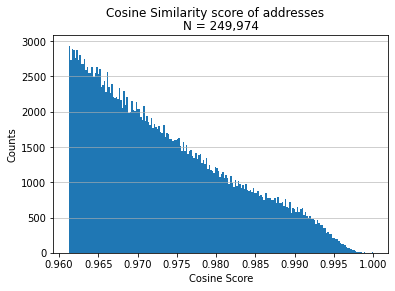

In [293]:
import matplotlib.pyplot as plt
import numpy as np

x = df_score['score_round']

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cosine Score')
plt.ylabel('Counts')
plt.suptitle('Cosine Similarity score of addresses')
plt.title('N = 249,974')

plt.hist(x,bins=200)
plt.show() 

<h4> Clustering the addresses or by zipcode

In [295]:
print(df_address.head())
df_sample_zip = df_address.iloc[0:10000,]
df_sample_zip.head()

    LoanNumber          BorrowerAddress BorrowerCity BorrowerState  \
13  5502308207  5015 BUSINESS PARK BLVD    ANCHORAGE            AK   
14  6110847106             7000 Uula St       BARROW            AK   
17  6650277102     4300 BARTLETT STREET        HOMER            AK   
20  3323817108             1118 5TH AVE    ANCHORAGE            AK   
21  1570017908       1740 S. CHUGACH ST       PALMER            AK   

   BorrowerZip ProjectCity  ProjectCountyName ProjectState  ProjectZip  \
13  99503-7146   ANCHORAGE          ANCHORAGE           AK  99503-7146   
14       99723      BARROW        NORTH SLOPE           AK  99723-0001   
17       99603       HOMER    KENAI PENINSULA           AK  99603-0001   
20  99501-2759   ANCHORAGE          ANCHORAGE           AK  99501-2759   
21  99645-6732      PALMER  MATANUSKA SUSITNA           AK  99645-6732   

                                  OriginatingLender  ForgivenessAmount    Zip  \
13                                    Northrim Bank  

,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address
13,5502308207,5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,ANCHORAGE,ANCHORAGE,AK,99503-7146,Northrim Bank,9615884.57,99503,5015 business park blvd anchorage ak 99503
14,6110847106,7000 Uula St,BARROW,AK,99723,BARROW,NORTH SLOPE,AK,99723-0001,"National Cooperative Bank, National Association",7761324.81,99723,7000 uula st barrow ak 99723
17,6650277102,4300 BARTLETT STREET,HOMER,AK,99603,HOMER,KENAI PENINSULA,AK,99603-0001,First National Bank Alaska,6598389.38,99603,4300 bartlett st homer ak 99603
20,3323817108,1118 5TH AVE,ANCHORAGE,AK,99501-2759,ANCHORAGE,ANCHORAGE,AK,99501-2759,East West Bank,6461470.84,99501,1118 5th ave anchorage ak 99501
21,1570017908,1740 S. CHUGACH ST,PALMER,AK,99645-6732,PALMER,MATANUSKA SUSITNA,AK,99645-6732,CoBank ACB,5987841.44,99645,1740 s chugach st palmer ak 99645


In [299]:
agg_func_counts = {'OriginatingLender': ['count'],
                    'Zip':['nunique'],
                    'ForgivenessAmount':['sum']}
df_group_zip=df_sample_zip.groupby(["OriginatingLender"]).agg(agg_func_counts)
print(df_group_zip.columns)
df_group_zip.sort_values(by=[('Zip', 'nunique')], ascending=False).head(20)

MultiIndex([('OriginatingLender',   'count'),
            (              'Zip', 'nunique'),
            ('ForgivenessAmount',     'sum')],
           )


,OriginatingLender,Zip,ForgivenessAmount
,count,nunique,sum
OriginatingLender,,,
ServisFirst Bank,1117,180,7.219786e+08
Regions Bank,727,176,5.809698e+08
"PNC Bank, National Association",354,126,2.646760e+08
Synovus Bank,540,123,3.397552e+08
Cadence Bank,248,109,1.558329e+08
Trustmark National Bank,196,91,1.149290e+08
Truist Bank,167,84,1.115789e+08
Renasant Bank,203,82,1.299936e+08


In [310]:
agg_func_counts = {'OriginatingLender': ['count'],
                    'Zip':['nunique'],
                    'ForgivenessAmount':['sum']}
df_group_zip=df_sample_zip.groupby(["OriginatingLender","Zip"]).agg(agg_func_counts)
print(df_group_zip.columns)
df_group_zip=df_group_zip.sort_values(by=[('Zip', 'nunique')], ascending=False)
#df_group_zip = df_group_zip.drop(['OriginatingLender','count'])
df_group_zip.head(n=20)

MultiIndex([('OriginatingLender',   'count'),
            (              'Zip', 'nunique'),
            ('ForgivenessAmount',     'sum')],
           )


OriginatingLender     Zip  \
                                                  count nunique   
OriginatingLender               Zip                               
1st Security Bank of Washington 99801                 1       1   
Renasant Bank                   36079                 1       1   
                                35405                 1       1   
                                35469                 1       1   
                                35470                 1       1   
                                35476                 1       1   
                                35576                 1       1   
                                35601                15       1   
                                35603                10       1   
                                35611                 1       1   
                                35613                 1       1   
                                35661                 1       1   
                                35673                 1       1   
                                35754                 1       1   
                                35758                 4       1   
                                35763                 1       1   
                                35801                 5       1   
                                35805                 1       1   
                                35806                 2       1   
                                35810                 1       1   

                                      ForgivenessAmount  
                                                    sum  
OriginatingLender               Zip                      
1st Security Bank of Washington 99801         269779.95  
Renasant Bank                   36079         679653.33  
                                35405         492694.67  
                                35469         223954.83  
                                35470         719260.39  
                                35476         256845.07  
                                35576         198186.18  
                                35601        7718941.51  
                                35603        4324304.94  
                                35611         198167.60  
                                35613         641290.80  
                                35661         481566.22  
                                35673         198315.45  
                                35754         216407.45  
                                35758        1807783.01  
                                35763         428366.87  
                                35801        1361918.03  
                                35805         614292.88  
                                35806         649636.38  
                                35810         225665.37

<h4> Geocoding the addresses

In [ ]:
##Finished - 02-17-2023
#!pip install --upgrade pip
#!pip install geopandas
#!pip install geopy

In [317]:
import geopandas
import geopy

In [337]:
df_s = df_address.iloc[901:5000]
print(df_s.shape)
df_sample_address=df_sample_address.append(df_s,ignore_index=True)
df_sample_address.shape

(4099, 13)


(4199, 13)

In [334]:
df_sample_address = df_address.iloc[0:100,]
df_sample_address.head()


,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address
13,5502308207,5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,ANCHORAGE,ANCHORAGE,AK,99503-7146,Northrim Bank,9615884.57,99503,5015 business park blvd anchorage ak 99503
14,6110847106,7000 Uula St,BARROW,AK,99723,BARROW,NORTH SLOPE,AK,99723-0001,"National Cooperative Bank, National Association",7761324.81,99723,7000 uula st barrow ak 99723
17,6650277102,4300 BARTLETT STREET,HOMER,AK,99603,HOMER,KENAI PENINSULA,AK,99603-0001,First National Bank Alaska,6598389.38,99603,4300 bartlett st homer ak 99603
20,3323817108,1118 5TH AVE,ANCHORAGE,AK,99501-2759,ANCHORAGE,ANCHORAGE,AK,99501-2759,East West Bank,6461470.84,99501,1118 5th ave anchorage ak 99501
21,1570017908,1740 S. CHUGACH ST,PALMER,AK,99645-6732,PALMER,MATANUSKA SUSITNA,AK,99645-6732,CoBank ACB,5987841.44,99645,1740 s chugach st palmer ak 99645


In [326]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")

In [329]:
import datetime

In [338]:
print('Number of records geocoded', df_sample_address.shape)
print('Start time ', datetime.datetime.now())
# Function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=.5)
# Create location column
df_sample_address['location'] = df_sample_address['combined_borrower_address'].apply(geocode)
# Create longitude, latitude and altitude from location column (returns tuple)
df_sample_address['point'] = df_sample_address['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# Split point column int latitude, longitude and altitude columns
df_sample_address[['latitude','longitude','altitude']] = pd.DataFrame(df_sample_address['point'].tolist(),index=df_sample_address.index)
print('End time ', datetime.datetime.now())

Number of records geocoded (4199, 13)
Start time  2023-02-17 17:35:12.696639


RateLimiter caught an error, retrying (0/2 tries). Called with (*('1419 east 1-65 service rd mobile al 36616',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_

RateLimiter swallowed an error after 2 retries. Called with (*('1419 east 1-65 service rd mobile al 36616',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAX

RateLimiter caught an error, retrying (1/2 tries). Called with (*('227 eastern blvd montgomery al 36117',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLI

RateLimiter caught an error, retrying (1/2 tries). Called with (*('60 commerce st ste 1100 montgomery al 36104',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline

RateLimiter caught an error, retrying (0/2 tries). Called with (*('792 commerce dr ste 101 alexander city al 35010',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.read

RateLimiter swallowed an error after 2 retries. Called with (*('792 commerce dr ste 101 alexander city al 35010',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readlin

RateLimiter caught an error, retrying (1/2 tries). Called with (*('23741 us hwy 43 linden al 36748',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1615 state st sheffield al 35660',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE +

RateLimiter caught an error, retrying (1/2 tries). Called with (*('700 maple st ste a birmingham al 35210',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAX

RateLimiter caught an error, retrying (0/2 tries). Called with (*('832 princeton ave w birmingham al 35211',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MA

RateLimiter swallowed an error after 2 retries. Called with (*('832 princeton ave w birmingham al 35211',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLI

RateLimiter caught an error, retrying (1/2 tries). Called with (*('248 lewis st montgomery al 36107',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE +

RateLimiter caught an error, retrying (0/2 tries). Called with (*('155 county rd 351 lynn al 35575',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 

RateLimiter swallowed an error after 2 retries. Called with (*('155 county rd 351 lynn al 35575',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1),

RateLimiter caught an error, retrying (1/2 tries). Called with (*('161 44 ave tuscaloosa al 35401',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1

RateLimiter caught an error, retrying (0/2 tries). Called with (*('210 progress dr andalusia al 36421',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE

RateLimiter caught an error, retrying (1/2 tries). Called with (*('601 reno st morris al 35116',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('459 dean rd ste b auburn al 36830',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE 

RateLimiter swallowed an error after 2 retries. Called with (*('459 dean rd ste b auburn al 36830',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1

RateLimiter caught an error, retrying (1/2 tries). Called with (*('201 ct st florence al 35630',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1107 w bypass andalusia al 36420',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE +

RateLimiter caught an error, retrying (1/2 tries). Called with (*('150 government st ste 2000 mobile al 36602',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(

RateLimiter caught an error, retrying (0/2 tries). Called with (*('3311 county rd 47 florence al 35630',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLIN

RateLimiter swallowed an error after 2 retries. Called with (*('3311 county rd 47 florence al 35630',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE +

RateLimiter caught an error, retrying (1/2 tries). Called with (*('3311 county rd 47 florence al 35630',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLIN

RateLimiter caught an error, retrying (0/2 tries). Called with (*('150 government st ste 2000 mobile al 36602',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(

RateLimiter swallowed an error after 2 retries. Called with (*('150 government st ste 2000 mobile al 36602',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MA

RateLimiter caught an error, retrying (0/2 tries). Called with (*('160 village st ste 100 birmingham al 35242',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(

RateLimiter swallowed an error after 2 retries. Called with (*('160 village st ste 100 birmingham al 35242',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MA

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2821 central ave ste 109 birmingham al 35209',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readlin

RateLimiter caught an error, retrying (0/2 tries). Called with (*('3300 11th ave birmingham al 35234',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('608 main st linden al 36748',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2501 bell rd ste 1 montgomery al 36117',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAX

RateLimiter swallowed an error after 2 retries. Called with (*('2501 bell rd ste 1 montgomery al 36117',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLIN

RateLimiter caught an error, retrying (1/2 tries). Called with (*('25910 canal rd ste o-200 orange beach al 36561',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readl

RateLimiter caught an error, retrying (0/2 tries). Called with (*('213 houston st athens al 35611',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1

RateLimiter swallowed an error after 2 retries. Called with (*('213 houston st athens al 35611',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('44080 hwy 17 s vernon al 35592',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1

RateLimiter caught an error, retrying (0/2 tries). Called with (*('400 front st bon air al 35032',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1)

RateLimiter swallowed an error after 2 retries. Called with (*('400 front st bon air al 35032',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "

RateLimiter caught an error, retrying (1/2 tries). Called with (*('600 joseph st alexander city al 35010',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXL

RateLimiter caught an error, retrying (0/2 tries). Called with (*('101 main st fulton al 36446',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), 

RateLimiter swallowed an error after 2 retries. Called with (*('101 main st fulton al 36446',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "is

RateLimiter caught an error, retrying (1/2 tries). Called with (*('2821 central ave ste 109 birmingham al 35209',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readlin

RateLimiter caught an error, retrying (0/2 tries). Called with (*('172 front st bon air al 35032',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1)

RateLimiter swallowed an error after 2 retries. Called with (*('172 front st bon air al 35032',), **{}).
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 1368, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 317, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/http/client.py", line 278, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "

End time  2023-02-17 18:34:09.841870


In [339]:
df_sample_address.tail()

,LoanNumber,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,OriginatingLender,ForgivenessAmount,Zip,combined_borrower_address,location,point,latitude,longitude,altitude
4194,8074657000,1450 Jones Dairy Rd Bldg 600,JASPER,AL,35501-6106,JASPER,WALKER,AL,35501-6106,Synovus Bank,502902.95,35501,1450 jones dairy rd bldg 600 jasper al 35501,None,None,NaN,NaN,NaN
4195,2321337108,13711 AL HIGHWAY 191,MAPLESVILLE,AL,36750-3553,MAPLESVILLE,CHILTON,AL,36750-3553,River Bank & Trust,503980.35,36750,13711 al hwy 191 maplesville al 36750,None,None,NaN,NaN,NaN
4196,6285527008,217 OXMOOR CIR,BIRMINGHAM,AL,35209-6425,BIRMINGHAM,JEFFERSON,AL,35209-6425,ServisFirst Bank,502524.92,35209,217 oxmoor cir birmingham al 35209,"(217, Oxmoor Circle, Edgemont Park, Homewood, ...","(33.45343720122564, -86.8379894140972, 0.0)",33.453437,-86.837989,0.0
4197,7332907002,350 INDUSTRIAL PARK BLVD,MONTGOMERY,AL,36117-5554,MONTGOMERY,MONTGOMERY,AL,36117-5554,ServisFirst Bank,502276.08,36117,350 industrial park blvd montgomery al 36117,"(Industrial Park Boulevard, Montgomery County,...","(32.3749687, -86.1114673, 0.0)",32.374969,-86.111467,0.0
4198,7626328410,4301 Coalburg Rd,Birmingham,AL,35207-1642,Birmingham,JEFFERSON,AL,35207-1642,SouthPoint Bank,502314.57,35207,4301 coalburg rd birmingham al 35207,"(Favor Steel, 4301, Coalburg Road, Acipcoville...","(33.5636572, -86.8409101524295, 0.0)",33.563657,-86.840910,0.0


In [341]:
#df_address_geo = df_sample_address
df_address_geo=df_address_geo.append(df_sample_address,ignore_index=True)
df_address_geo.shape

(5099, 18)

In [342]:
os.getcwd()


'/Users/jeffreymagouirk/Downloads'

In [343]:
df_address_geo.to_csv('df_address_geo_ppp.csv',sep=',',encoding='utf-8')